# It's time for the ANALYSIS!

In [1]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# read in the json files
portfolio = pd.read_json('clean_data/portfolio.json')
profile = pd.read_json('clean_data/profile.json')
offers_influence = pd.read_json('clean_data/offers_influence.json')
offers = pd.read_json('clean_data/offers.json')

### Finding customer clusters based on their age, gender and months as user

In [3]:
profile.shape[0]

17000

In [4]:
not_null_profile = profile.dropna()

In [5]:
not_null_profile.shape[0]

14820

In [6]:
not_null_profile.sign_up_year.min()

2013

In [7]:
def months_since_2013(year, month):
    return ((year - 2013) * 12) + month

In [8]:
not_null_profile['months_since_2013'] = [months_since_2013(row.sign_up_year, row.sign_up_month) for index, row in not_null_profile.iterrows()]

/mnt/c/Users/Kevin/Documents/kevin/starbucks_challenge/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
important_columns = ['age', 'became_member_on', 'income', 'F', 'M', 'O', 'months_since_2013']

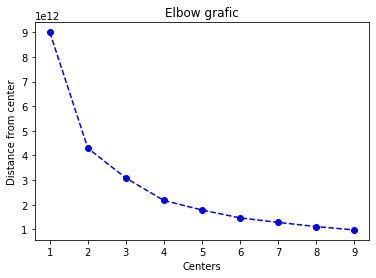

In [10]:
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1, 10, 1))

for center in centers:
    scores.append(get_kmeans_score(not_null_profile[important_columns], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Centers');
plt.ylabel('Distance from center');
plt.title('Elbow grafic'); 

In [25]:
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(not_null_profile[important_columns])
not_null_profile['cluster'] = model.predict(not_null_profile[important_columns])

/mnt/c/Users/Kevin/Documents/kevin/starbucks_challenge/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
for cluster_number, cluster in not_null_profile[important_columns + ['cluster']].groupby('cluster'):
    print("Cluster:", cluster_number)
    print(cluster.)
    print("\n\n")

0
               age  became_member_on        income            F            M  \
count  4253.000000      4.253000e+03   4253.000000  4253.000000  4253.000000   
mean     49.119445      2.017324e+07  43048.906654     0.306137     0.679520   
std      18.358849      6.460036e+03   7823.966175     0.460941     0.466716   
min      18.000000      2.016010e+07  30000.000000     0.000000     0.000000   
25%      34.000000      2.017073e+07  36000.000000     0.000000     0.000000   
50%      49.000000      2.017111e+07  43000.000000     0.000000     1.000000   
75%      63.000000      2.018031e+07  50000.000000     1.000000     1.000000   
max     100.000000      2.018073e+07  56000.000000     1.000000     1.000000   

                 O  months_since_2013  cluster  
count  4253.000000        4253.000000   4253.0  
mean      0.014343          57.559135      0.0  
std       0.118914           7.087817      0.0  
min       0.000000          37.000000      0.0  
25%       0.000000          55.0

array([55.0, 20170715, 112000.0, 1, 0, 0, 55], dtype=object)